[텐서플로 2.0 시작하기: 초보자용](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko)
- 손글씨를 입력해서 컴퓨터가 0~9 숫자를 판별

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # 넘파이 압축 파일
x_train, x_test = x_train / 255.0, x_test / 255.0

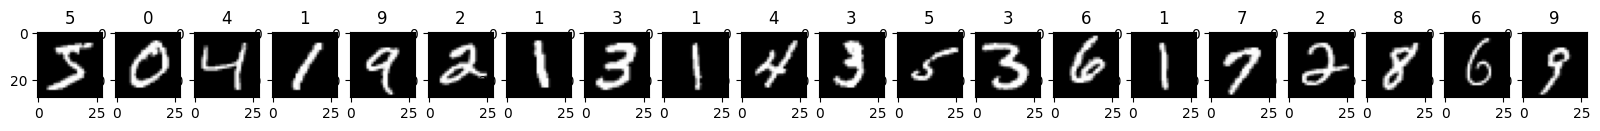

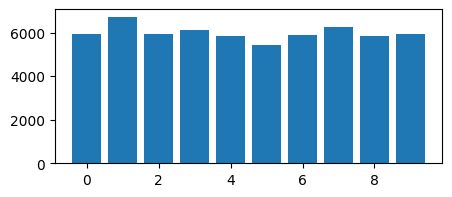

In [5]:
import matplotlib.pyplot as plt

def plot(dataX,dataY, num=10):
    plt.figure(figsize=(20,20))
    for cnt,x in enumerate(dataX[:num]):
        plt.subplot(1,num,cnt+1)
        plt.imshow(x,cmap='gray')
        plt.title(dataY[cnt])

def count(data):
    import numpy as np
    tmp = np.unique(data, return_counts=True)
    plt.figure(figsize=(5,2))
    plt.bar(tmp[0],tmp[1])

plot(x_train,y_train,20)
count(y_train)



### 숫자 5가 있는 모든 x와 y 분류해서 저장


<Figure size 5000x5000 with 0 Axes>

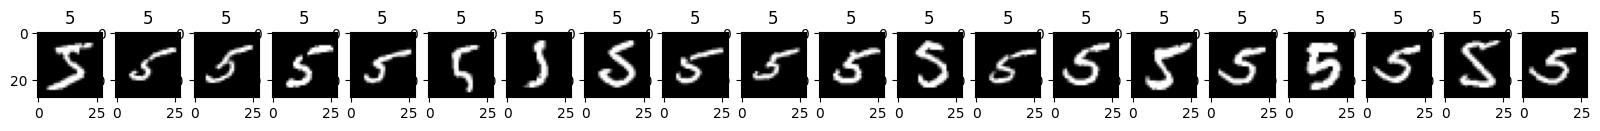

In [6]:
newX=[]
newY=[]
select_num=5
for x,y in zip(x_train,y_train):
    if y==select_num:
        newX.append(x)
        newY.append(y)
plt.figure(figsize=(50,50))
plot(newX,newY,20)

#### 사진 특징
- 크기 28x28
- 컬러모드 흑백
- 배경 흑백
- 글자 위치 
  - 숫자가 가운데 있지 않고, 왼쪽이나 오른쪽으로 치우처져 있으면 인식을 잘하지 못한다
- 0 ~ 255 / 255 나눈 값으로 학습함
- 

In [7]:
import numpy as np
np.shape(x_train),np.shape(y_train)

((60000, 28, 28), (60000,))

In [35]:
# 모델제작
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28*28
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 배치 사이즈, 오차계산법(경사하강, 오차역전파), 화면에 보여줄 값 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 컴파일러에서 모델을 갖고와서 순전파와 역전파를 진행하고
# w,b를 계속 갱신하면서 모든 데이터를 총 에포크만큼 반복
# 60000/32 # 트레이닝 자료를 이용해서 w,b를 갱신
# val_loss, val_accuracy가 다른 수치보다 중요하다
# 맨 마지막에 나온 w, b만 출력이 되지만, 최적의 값은 아니다
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test), batch_size=6000) 
# 에포크 높게하고 배치는 작게, 에포크를 적게 배치는 많이
# 에포크가 한번 도는데 몇개의 '총량/배치'를 가지고 할것인가?
# 참고로 배치가 작으면 작을 수록 트레이닝 데이터에 오버피팅이 된다.
# 옵티마이저는 오차를 갱신하는 방법


Epoch 1/50
10/10 [==============================] - 1s 34ms/step - loss: 1.8597 - accuracy: 0.4376 - val_loss: 1.2639 - val_accuracy: 0.7526
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 1.0303 - accuracy: 0.7478 - val_loss: 0.7021 - val_accuracy: 0.8297
Epoch 3/50
10/10 [==============================] - 0s 18ms/step - loss: 0.6702 - accuracy: 0.8135 - val_loss: 0.4975 - val_accuracy: 0.8696
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 0.5252 - accuracy: 0.8495 - val_loss: 0.4117 - val_accuracy: 0.8907
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4507 - accuracy: 0.8709 - val_loss: 0.3634 - val_accuracy: 0.9025
Epoch 6/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4034 - accuracy: 0.8849 - val_loss: 0.3317 - val_accuracy: 0.9118
Epoch 7/50
10/10 [==============================] - 0s 19ms/step - loss: 0.3710 - accuracy: 0.8958 - val_loss: 0.3085 - val_accuracy: 0.9171
Epoch 8/50
10

In [ ]:
# 전이학습은 h5파일을 가져오는 과정
# model.save('c:/data/myMnist.h5')

In [11]:
model=tf.keras.models.load_model('c:/data/myMnist.h5')

1/1 [==============================] - 0s 13ms/step


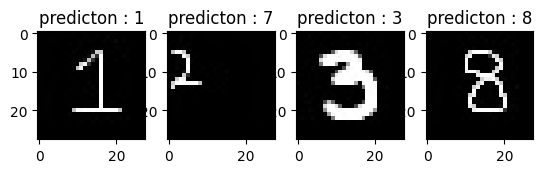

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

fileList = glob('c:/data/mnist_img/*.jpg')

for cnt,x in enumerate(fileList):
    img = Image.open(x).resize((28,28)).convert('L') # 흑백으로 불러오기
    img = 255 - np.array(img) # 색 반전시키고 어레이에 추가
    img = img/255 # 전에 /255로 나누었으니까
    np.shape(img) # 컨버트하지 않으면 (28,28,3)
    pred_num = model.predict(img.reshape(-1,28,28)) # 모델 제작할 때 가장 아래 쪽에 있던 10에 의해서 10개의 확률값이 생성. 그 중 확률이 가장 높은 수 출력
    pred_max = np.argmax(pred_num)
    plt.subplot(1,len(fileList),cnt+1)
    plt.title('predicton : '+str(pred_max))
    plt.imshow(img, cmap='gray') 

In [13]:
img.max(), img.min() # 스케일링이 됐는지 확인하기 # 스케일링을 안하면 컴퓨터 자료의 양을 넘어갈 수 있다

(1.0, 0.0)

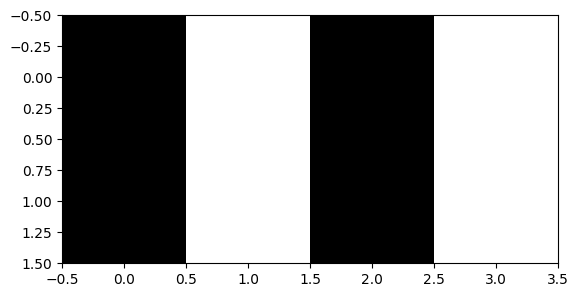

In [38]:
# 검정색 0 흰색 255
# 흰색 검은색 반전은 255에서 빼면 된
a=[[0,255,0,255],[0,255,0,255]]
plt.imshow(a, cmap='gray')